In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dispo_alimentaire = pd.read_csv('data/dispo_alimentaire.csv')
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# suppression des NaN
dispo_alimentaire = dispo_alimentaire.dropna()

In [4]:
aide_alimentaire = pd.read_csv('data/aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [5]:
aide_alimentaire.info()
print("-------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB
-------------------------------


In [6]:
population = pd.read_csv('data/population.csv')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [7]:
population.info()
print("-------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
-------------------------------


In [8]:
sous_nutrition = pd.read_csv('data/sous_nutrition.csv')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [9]:
sous_nutrition["Année"] = sous_nutrition["Année"].map({'2012-2014': 2013,
                                                       '2013-2015': 2014,
                                                       '2014-2016': 2015,
                                                       '2015-2017': 2016,
                                                       '2016-2018': 2017,
                                                       '2017-2019': 2018})

In [10]:
# suppression des NaN
sous_nutrition = sous_nutrition.dropna()

In [11]:
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].astype(str)

In [12]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [13]:
sous_nutrition.info()
print("-------------------------------")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    624 non-null    object
 1   Année   624 non-null    int64 
 2   Valeur  624 non-null    object
dtypes: int64(1), object(2)
memory usage: 19.5+ KB
-------------------------------


In [14]:
# Changement des noms de colonnes

aide_alimentaire = aide_alimentaire.rename(columns = {'Pays bénéficiaire': 'Zone', 'Valeur': 'Quantité (en tonne)'})
sous_nutrition = sous_nutrition.rename(columns = {'Valeur': 'sous_nutrition (million)'})
population = population.rename(columns = {'Valeur': 'nb_population (millier)'})

In [15]:
def merge_année(année=str):
    aide_alimentaire["Année"] = aide_alimentaire["Année"].astype(str)
    d1 = aide_alimentaire[aide_alimentaire["Année"] == année]
    sous_nutrition["Année"] = sous_nutrition["Année"].astype(str)
    d2 = sous_nutrition[sous_nutrition["Année"] == année]
    population["Année"] = population["Année"].astype(str)
    d3 = population[population["Année"] == année]
    ano = d1.merge(d2, on = "Zone", how = "left")
    result = ano.merge(d3, on = "Zone", how = "left")
    result["nb_population (million)"] = round((result["nb_population (millier)"]/1000),2)
    result['rapport_nutritionnel (tonne/habitant)'] = round((result["Quantité (en tonne)"] / result["nb_population (million)"]),2)
    result = result.dropna()
    nutri = result.groupby("Zone", axis = 0).min()
    nutri = nutri.reset_index()
    fig, ax = plt.subplots(1,2, figsize = (12,8))
    sns.barplot(data = nutri.sort_values("rapport_nutritionnel (tonne/habitant)", ascending = False).head(5),\
                     y = "rapport_nutritionnel (tonne/habitant)", x = "Zone", ax = ax[0])

    plt.title('Top 5 des pays en ratio alimentaire')
    sns.barplot(data= nutri.sort_values("rapport_nutritionnel (tonne/habitant)", ascending = True).head(5),\
                     y = "rapport_nutritionnel (tonne/habitant)", x = "Zone", ax = ax[1])
    plt.title('Flop 5 des pays en ratio alimentaire')
    fig.show()
    return nutri

,Zone,Année_x,Produit,Quantité (en tonne),Année_y,sous_nutrition (million),Année,nb_population (millier),nb_population (million),rapport_nutritionnel (tonne/habitant)
0,Afghanistan,2013,Autres non-céréales,85,2013,8.6,2013,32269.589,32.27,2.63
1,Algérie,2013,Autres non-céréales,204,2013,1.3,2013,38140.133,38.14,5.35
2,Angola,2013,Céréales,2500,2013,7.6,2013,26015.781,26.02,96.08
3,Bangladesh,2013,Blé et Farin,81,2013,21.7,2013,152761.418,152.76,0.53
4,Burkina Faso,2013,Autres non-céréales,10,2013,3.1,2013,17072.785,17.07,0.59
5,Bénin,2013,Autres non-céréales,45,2013,0.8,2013,10004.591,10.00,4.50
6,Cambodge,2013,Autres non-céréales,50,2013,2.1,2013,15026.332,15.03,3.33
7,Cameroun,2013,Autres non-céréales,117,2013,1.5,2013,22077.294,22.08,5.30
8,Colombie,2013,Céréales,138,2013,3.9,2013,46495.493,46.50,2.97
9,Congo,2013,Autres non-céréales,18,2013,1.4,2013,4622.762,4.62,3.90


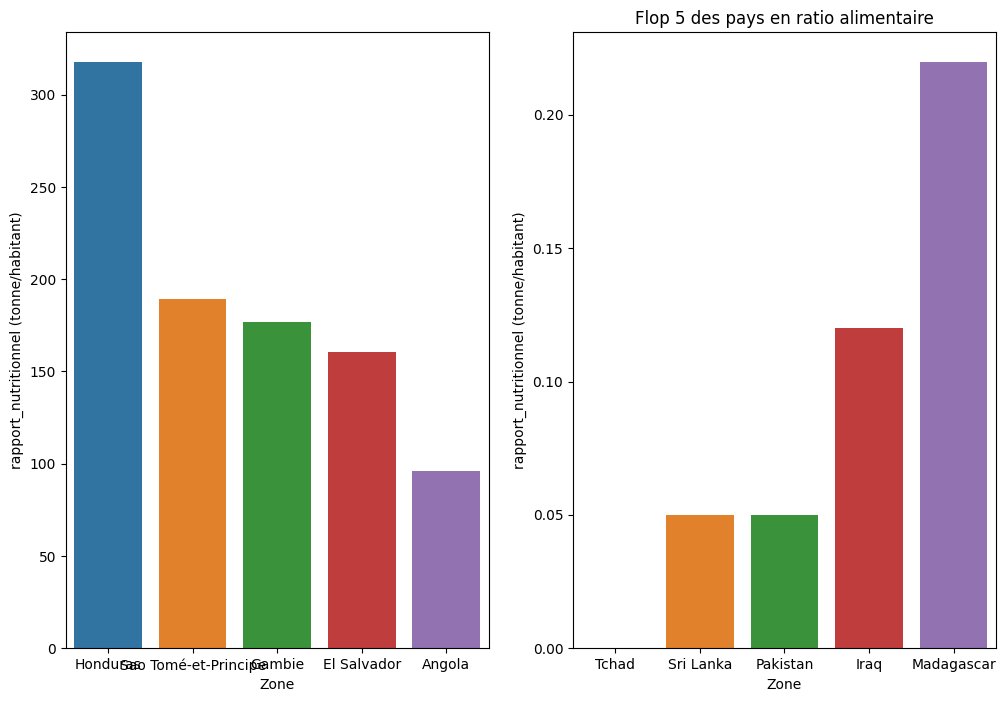

In [16]:
merge_année("2013")